# Project 1 TAA

## Expression Recognition with Keras

### Load datasets from file

In [130]:
#Import relevant libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
#to load matlab mat files
from scipy.io import loadmat
# for neural network
import tensorflow as tf
from tensorflow import keras

In [131]:
# labelNames = ["angry", "fear", "happy", "neutral", "sad", "surprise"]
labelNames = ["happy", "sad"]

# Load Training data
mat=loadmat(f"../datasets/train/{'_'.join(labelNames)}.mat")
# mat is a dict with key "X" for x-values, and key "y" for y values
X, y = mat["X"], mat["y"]

# Load Dev Data
matDev=loadmat(f"../datasets/dev/{'_'.join(labelNames)}.mat")
X_valid, y_valid = matDev["X"], matDev["y"]

# Load Test Data
matTest=loadmat(f"../datasets/test/{'_'.join(labelNames)}.mat")
X_test, y_test = matTest["X"], matTest["y"]

In [133]:
# numbers
m = X.shape[0] # number of training examples
labels = np.max(y)+1 # number of labels
features = X.shape[1:] # number of features per example

print(f"Loaded {m} traing examples with {labels} labels, each with {features} features (pixels).")
print("Labels are:", ', '.join(labelNames))

print(f"Loaded {X_valid.shape[0]} dev examples.")
print(f"Loaded {X_test.shape[0]} test examples.")

Loaded 2000 traing examples with 2 labels, each with (2304,) features (pixels).
Labels are: happy, sad
Loaded 400 dev examples.
Loaded 400 test examples.


### Some examples

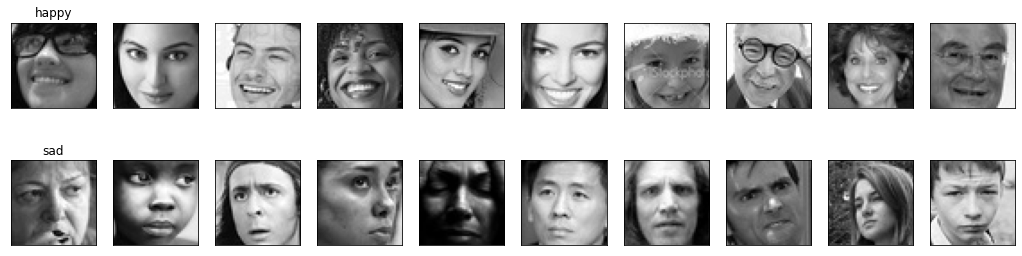

In [151]:
examplesNumber = 10
fig, axis = plt.subplots(labels,examplesNumber,figsize=(18,2*labels))
fig.subplots_adjust(top=1)

# Foreach label, output 10 random images
for i in range(labels):
    for j in range(examplesNumber):
        # Show image
        axis[i,j].imshow(X[np.random.randint((m/labels)*(i),(m/labels)*(i+1)+1),:].reshape(48,48,order="F").T, cmap="gray") 
        # Hide axes
        axis[i,j].set_xticks([])
        axis[i,j].set_yticks([])
        # Display title only on first
        if j==0:
            axis[i,j].set_title(labelNames[i])

### The neural network

Based on https://medium.com/nerd-for-tech/how-to-train-neural-networks-for-image-classification-part-1-21327fe1cc1

In [135]:
# Important variables
iterations = 100
hiddenLayers = [144]
hyperParameter = 0.001

#### Build the network

In [142]:
# Create model
modelSeq = []
# Flattens each image (48x48) to 1x2304
modelSeq.append(keras.layers.Flatten(input_shape = [2304]))
# Hidden layers with relu activation function
for h in hiddenLayers:
    modelSeq.append(keras.layers.Dense(
        h, 
        activation = "relu", 
        bias_regularizer= keras.regularizers.l2(hyperParameter) if hyperParameter else None
    ))
# Output layer with softmax activation function
modelSeq.append(keras.layers.Dense(
    labels, 
    activation = "softmax",
    bias_regularizer= keras.regularizers.l2(hyperParameter) if hyperParameter else None
))

model = keras.models.Sequential(modelSeq)

model.summary()

Model: "sequential_27"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_24 (Flatten)         (None, 2304)              0         
_________________________________________________________________
dense_55 (Dense)             (None, 144)               331920    
_________________________________________________________________
dense_56 (Dense)             (None, 2)                 290       
Total params: 332,210
Trainable params: 332,210
Non-trainable params: 0
_________________________________________________________________


In [143]:
# Compile model

model.compile(
    # Using sparse categorical crossentropy loss function
    loss = "sparse_categorical_crossentropy",
    # Using stochastic gradient descent as gradient descent
    optimizer = "sgd",
    # In addition to cost, we want accuracy to help understanding how the model is working 
    metrics = ["accuracy"]
)

#### Train the network

In [144]:
history = model.fit(
    X,
    y,
    epochs = iterations,
    batch_size = 128,
    validation_data = (X_valid, y_valid)
)

Epoch 1/100
16/16 [==============================] - 0s 11ms/step - loss: 0.7633 - accuracy: 0.5251 - val_loss: 0.7057 - val_accuracy: 0.5275
Epoch 2/100
16/16 [==============================] - 0s 6ms/step - loss: 0.7439 - accuracy: 0.4894 - val_loss: 0.6668 - val_accuracy: 0.5525
Epoch 3/100
16/16 [==============================] - 0s 5ms/step - loss: 0.6722 - accuracy: 0.5798 - val_loss: 0.6504 - val_accuracy: 0.6075
Epoch 4/100
16/16 [==============================] - 0s 5ms/step - loss: 0.6730 - accuracy: 0.6040 - val_loss: 0.6630 - val_accuracy: 0.5775
Epoch 5/100
16/16 [==============================] - 0s 5ms/step - loss: 0.6754 - accuracy: 0.5771 - val_loss: 0.6762 - val_accuracy: 0.5550
Epoch 6/100
16/16 [==============================] - 0s 6ms/step - loss: 0.7004 - accuracy: 0.5576 - val_loss: 0.6562 - val_accuracy: 0.5775
Epoch 7/100
16/16 [==============================] - 0s 6ms/step - loss: 0.6533 - accuracy: 0.6166 - val_loss: 0.6218 - val_accuracy: 0.6850
Epoch 8/100


16/16 [==============================] - 0s 8ms/step - loss: 0.5381 - accuracy: 0.7576 - val_loss: 0.5972 - val_accuracy: 0.6500
Epoch 59/100
16/16 [==============================] - 0s 8ms/step - loss: 0.5639 - accuracy: 0.7123 - val_loss: 0.5854 - val_accuracy: 0.6950
Epoch 60/100
16/16 [==============================] - 0s 9ms/step - loss: 0.5448 - accuracy: 0.7360 - val_loss: 0.5690 - val_accuracy: 0.6875
Epoch 61/100
16/16 [==============================] - 0s 7ms/step - loss: 0.5850 - accuracy: 0.6848 - val_loss: 0.5876 - val_accuracy: 0.6650
Epoch 62/100
16/16 [==============================] - 0s 7ms/step - loss: 0.5516 - accuracy: 0.7203 - val_loss: 0.5661 - val_accuracy: 0.7425
Epoch 63/100
16/16 [==============================] - 0s 9ms/step - loss: 0.5282 - accuracy: 0.7598 - val_loss: 0.5565 - val_accuracy: 0.7125
Epoch 64/100
16/16 [==============================] - 0s 7ms/step - loss: 0.5302 - accuracy: 0.7636 - val_loss: 0.5686 - val_accuracy: 0.7000
Epoch 65/100
16/16 

#### Evaluate the performance with test set

In [145]:
model.evaluate(X_test, y_test, return_dict=True)

13/13 [==============================] - 0s 952us/step - loss: 0.8062 - accuracy: 0.5475


{'loss': 0.806174635887146, 'accuracy': 0.5475000143051147}

### Analysys

#### Training metrics

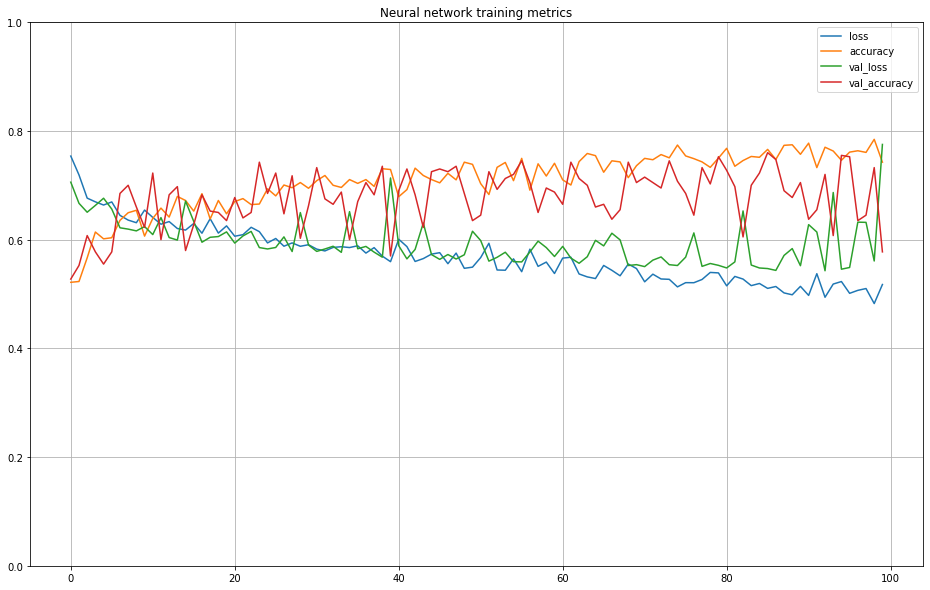

In [146]:
pd.DataFrame(history.history).plot(figsize = (16, 10))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.title("Neural network training metrics")
plt.show()

> If the loss does not look like it has reached a minimum (being stable on the end), it suggests we can train the network further.

> It is normal that the accuracy for the training set is higher than for the validation set, but they might be close. If not, there is overfitting!

#### Confusion matrix

In [147]:
def confusionMatrix(labels, pred, y):
    
    confusionTFPN = {}
    confusionLabels = {}
    
    # Foreach emotion
    for ie in range(len(labels)):
        # TRUE AND FALSE POSITIVES AND NEGATIVES (TFPN)
        
        # Get indexes where emotion was predicted
        ieIndexesPred = [i for i in range(pred.size) if pred[i]==ie]
        ieIndexesNotPred = [i for i in range(pred.size) if pred[i]!=ie]

        # Predicted, and Actual
        TP = sum(pred[:,np.newaxis][ieIndexesPred]==y[ieIndexesPred])
        # Predicted, but not actual
        FP = sum(pred[:,np.newaxis][ieIndexesPred]!=y[ieIndexesPred])
        # Not predicted, but actual
        FN = sum(y[ieIndexesNotPred]==ie)
        # Not predicted and not actual
        TN = sum(y[ieIndexesNotPred]!=ie)

        TP = TP[0] if TP else 0
        FP = FP[0] if FP else 0
        FN = FN[0] if FN else 0
        TN = TN[0] if TN else 0
        
        confusionTFPN[labels[ie]] = {
            'TP': TP,
            'FP': FP,
            'FN': FN,
            'TN': TN
        }
        
        # CONFUSION WITH OTHER labels (Confusion)
        # For emotion e
        # Count the number of predictions made for all classes
        # Foreach emotion, check how many times it has been predicted 
        
        # Get indexes where emotion is real
        ieIndexesY = [i for i in range(y.size) if y[i]==ie]
        
        # Foreach matching prediction, check what emotion was predicted
        confusionLabels[labels[ie]] = {
            e: sum(pred[:,np.newaxis][ieIndexesY]==labels.index(e))[0] for e in labels
        }
        
    return confusionTFPN, confusionLabels

In [148]:
def outputConfusionTables(labels, testExamplesNumber, confusionTFPN, confusionLabels, axs, axsLine, axsTitle):
     # TABLES
    rows = tuple(labels)
    
    # TABLES / TFPN
    # Output confusion matrix as plot table
    data = [
        [
            f"{vals['TP']} ({vals['TP']/testExamplesNumber*100:.2f}%)",
            f"{vals['TN']} ({vals['TN']/testExamplesNumber*100:.2f}%)",
            f"{vals['TP']+vals['TN']} ({(vals['TP']+vals['TN'])/testExamplesNumber*100:.2f}%)",
            f"{vals['FP']} ({vals['FP']/testExamplesNumber*100:.2f}%)",
            f"{vals['FN']} ({vals['FN']/testExamplesNumber*100:.2f}%)",
            f"{vals['FP']+vals['FN']} ({(vals['FP']+vals['FN'])/testExamplesNumber*100:.2f}%)",
            vals['FP']+vals['FN']+vals['TP']+vals['TN']
        ]
        for _, vals in confusionTFPN.items()
    ]
    columns = ['TP (%)', 'TN (%)', 'T (%)', 'FP (%)', 'FN (%)', 'F (%)', f"Total"]
    
    # Colorize cells depending on value 
    cellColoursTF=plt.cm.Blues([
        [ (vals['TP']+vals['TN'])/testExamplesNumber, (vals['FP']+vals['FN'])/testExamplesNumber ] for _, vals in confusionTFPN.items()
    ])
    cellColourPos=plt.cm.Greens([
        [ vals['TP']/(vals['TP']+vals['FP']), vals['FP']/(vals['TP']+vals['FP']) ] for _, vals in confusionTFPN.items()
    ])
    cellColourNeg=plt.cm.Reds([
        [ vals['TN']/(vals['TN']+vals['FN']), vals['FN']/(vals['TN']+vals['FN']) ] for _, vals in confusionTFPN.items()
    ])
    
    cellColours = [
        [
            cellColourPos[i][0],
            cellColourNeg[i][0],
            cellColoursTF[i][0],
            cellColourPos[i][1],
            cellColourNeg[i][1],
            cellColoursTF[i][1],
            [0, 0, 0, 0]
        ]
        for i in range(len(rows))
    ]
    
    the_table = axs[axsLine].table(
      cellText=data,
      rowLabels=rows,
      colLabels=columns,
      loc='center',
      cellColours=cellColours
    )
    # the_table.scale(1.2, 1)
    the_table.auto_set_font_size(False)
    the_table.set_fontsize(20)
    axs[axsLine].axis('off')
    axs[axsLine].axis('tight')
    axs[axsLine].set_title(f"Confusion matrix {axsTitle}", fontsize=20, pad=0)    
    
    # TABLES / Confusion    
    # Output confusion matrix as plot table
    data = [[o for _,o in others.items()] for _,others in confusionLabels.items()]
    columns = rows
    
    # Colorize cells depending on value
    vals = [o for _,others in confusionLabels.items() for _,o in others.items()]
    normal = plt.Normalize(min(vals)-1, max(vals)+1)
    cellColours=plt.cm.Blues(normal(data))
        
    the_table = axs[axsLine+1].table(
      cellText=data,
      rowLabels=rows,
      colLabels=columns,
      loc='center',
      cellColours=cellColours
    )
    
    the_table.set_fontsize(20)
    # the_table.scale(1, 4)
    axs[axsLine+1].axis('off')
    axs[axsLine+1].axis('tight')
    axs[axsLine+1].set_title(f"True/Predicted {axsTitle}", fontsize=20)
    

In [149]:
# Get y predicted for test data set
predict = model.predict(X_test)
y_pred = np.array([np.argmax(p) for p in predict])

# Compute confusions
confusionTFPN, confusionLabels = confusionMatrix(labelNames, y_pred, y_test)

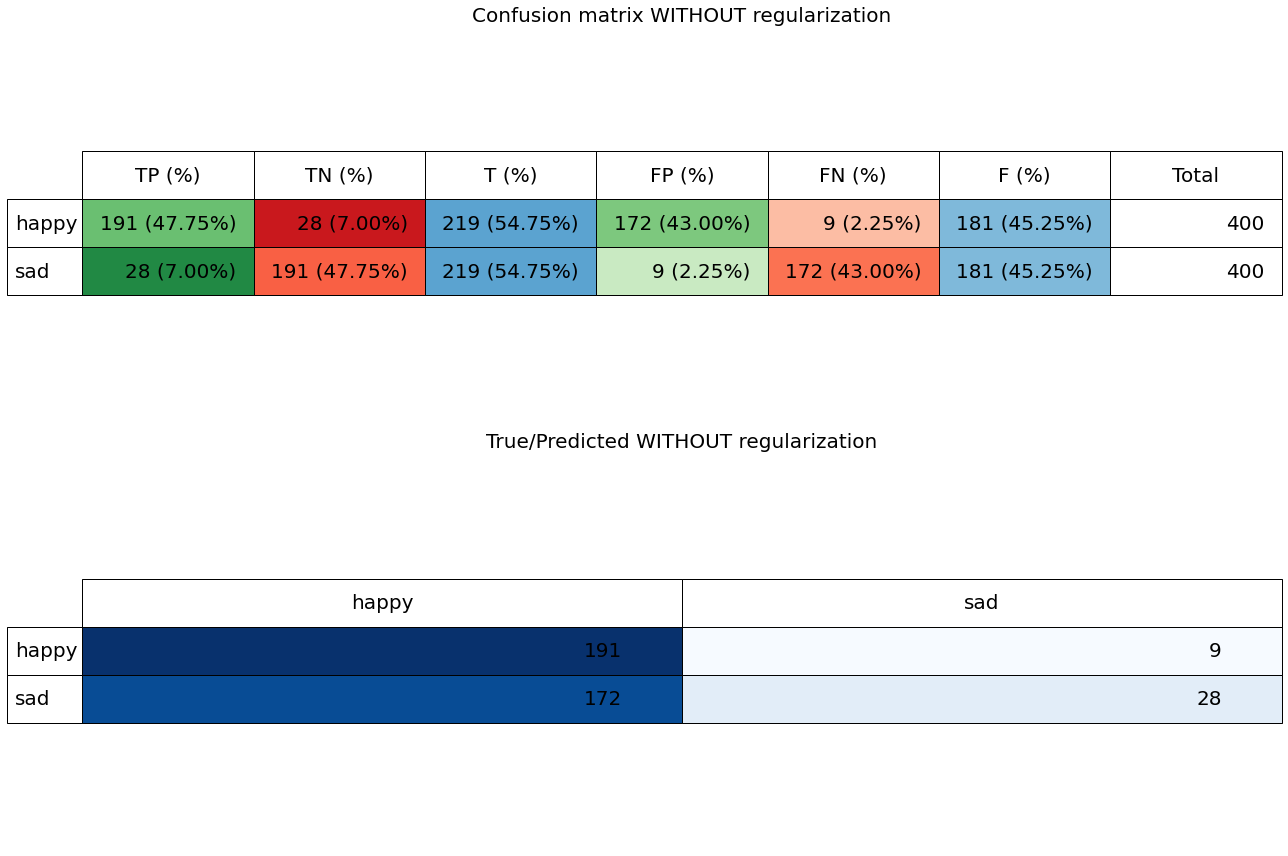

In [150]:
# Display as table
fig, axs = plt.subplots(2,1)

outputConfusionTables(labelNames, y_test.size, confusionTFPN, confusionLabels, axs, 0, "WITHOUT regularization")


fig.set_size_inches(18,6*len(labelNames))
fig.subplots_adjust(left=0.2, top=20)
fig.tight_layout()

#### Images classification

In [ ]:
import math

imagesPerLine = 4
lines = math.ceil(len(y_test)/imagesPerLine)

fig, axis = plt.subplots(lines,imagesPerLine,figsize=(18,2*lines))
fig.subplots_adjust(top=1)

for i in range(lines):
    for j in range(imagesPerLine):
        index = i*imagesPerLine + j
        
        if X_test.shape[0]<=index:
            break
        
        # Show image
        axis[i,j].imshow(X_test[index,:].reshape(48,48,order="F").T, cmap="gray") 
        
        # Hide axes
        axis[i,j].set_xticks([])
        axis[i,j].set_yticks([])
        # Display title with predicted (actual)
        axis[i,j].set_title(f"{labelNames[y_pred[index]]} ({labelNames[y_test[index][0]]})")
        
fig.suptitle('Images prediction (actual) labels', fontsize=16, y=1.1) 

plt.savefig(f"../datasets/images/goncalo_catalog/predictions.png")